In [41]:
import numpy as np
from PIL import Image as IMG
import os
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm

In [8]:
img_pth = 'Image/'

In [136]:
file = '0.png'
img = np.array(IMG.open(img_pth + os.sep + file))
gt_norm = np.array(IMG.open('GT_norm'+os.sep+file))[:,:,0:3]
gt_seg = np.array(IMG.open('GT_seg'+os.sep+file))
pred_norm = np.array(IMG.open('Preds'+os.sep+'Norm'+os.sep+file.split('.')[0]+'_pred.png'))
npy_seg =  np.load('Preds'+os.sep+'Seg'+os.sep+file.split('.')[0]+'_pred.npy')

In [128]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)
def angle(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [129]:
thetas = []
for i in range(pred_norm.shape[0]):
    for j in range(pred_norm.shape[1]):
        v1 = pred_norm[i, j, 0:3]
        v2 = gt_norm[i, j, 0:3]
        thetas.append(angle(v1, v2))
thetas = np.rad2deg(np.array(thetas))

In [121]:
l1_ = (thetas<11.5).astype(int)
l2_ = (thetas<22.5).astype(int)
l3_ = (thetas<30).astype(int)

In [122]:
l1 = sum(l1_)/len(thetas)
l2 = sum(l2_)/len(thetas)
l3 = sum(l3_)/len(thetas)

In [133]:
CLASS_LABELS = {
    'Other': 0,
    'Table': 1,
    'Shelve': 2,
    'Book': 3,
    'Couch': 4,
    'Frame': 5,
    'Lamp': 6,
    'Plant': 7,
    'Rug': 8,
    'Wall': 9,
    'Floor': 10,
    'TV': 11,
    'Window': 12,
    'Curtain': 13,
    'Door': 14}

In [134]:
CLASS_RGB = {
    'Other': (0, 0, 0),
    'Table': (89, 20, 0),
    'Shelve': (0, 25, 0),
    'Book': (38, 51, 76),
    'Couch': (0, 0, 51),
    'Frame': (255, 0, 0),
    'Lamp': (101, 178, 0),
    'Plant': (255, 255, 0),
    'Rug': (0, 255, 0),
    'Wall': (101, 101, 101),
    'Floor': (0, 255, 255),
    'TV': (255, 0, 76),
    'Window': (204, 204, 153),
    'Curtain': (0, 76, 255),
    'Door': (255, 0, 255)}

In [154]:
def get_lbl(cname, gt):
    r, g, b = CLASS_RGB[cname]
    cls = np.zeros_like(gt[:,:,1])
    logic = np.logical_and.reduce( [gt[:, :, 0] == r, gt[:, :, 1] == g, gt[:, :, 2] == b])
    ix = np.array(list(zip(*np.where(logic))))
    if len(ix) > 0:
        cls[ix[:,0], ix[:,1]] = 1
    return cls

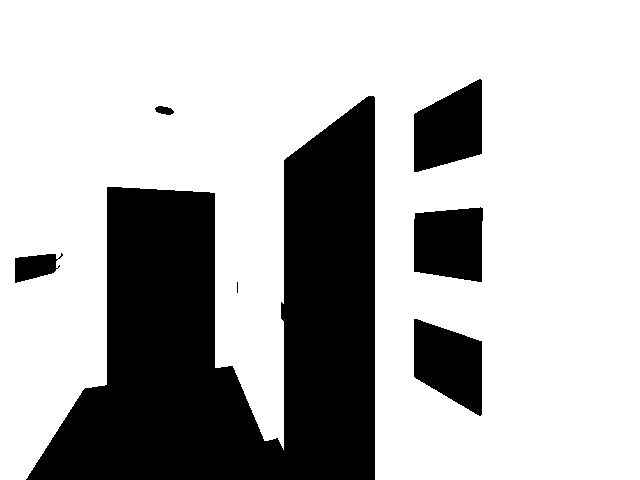